In [ ]:
import numpy as np
import random 
import math
import copy

In [1434]:
def fitness(x1, x2) : 
  return math.cos(math.radians(x1)) * math.sin(math.radians(x2)) - x1 / (x2**2 + 1)

class Individu() : 
  def __init__(self, function, c_len, r1, r2) : 
    self.function = function
    self.r1 = r1 
    self.r2 = r2
    self.c_len = c_len 

    self.chromosome = np.random.randint(2, size=c_len)
    self.x1 = self.decode(self.chromosome[0:len(self.chromosome)//2], r1[0], r1[1])
    self.x2 = self.decode(self.chromosome[len(self.chromosome)//2 :], r2[0], r2[1])
    self.fitness = function(self.x1, self.x2)

  def decode(self, chromosome, rmin, rmax) :
    n = len(chromosome)
    sig = 0
    sum = 0
    for i, gen in enumerate(chromosome): 
      sig += math.pow(2, -(i+1))
      sum += gen * math.pow(2, -(i+1))

    return rmin + ((rmax - rmin)/sig * sum)

  def updateGen(self, new) : 
    self.chromosome = new
    self.x1 = self.decode(self.chromosome[0:len(self.chromosome)//2], self.r1[0], self.r1[1])
    self.x2 = self.decode(self.chromosome[len(self.chromosome)//2 :], self.r2[0], self.r2[1])
    self.fitness = self.function(self.x1, self.x2)

  def setProbability(self, total) : 
    self.probability = self.fitness / total
  
class Populasi() : 
  def __init__(self, size, function, c_len, r1, r2) :
    self.size = size 
    self.function = function
    self.individu = self._initPopulation(size, function, c_len, r1, r2)
    self.individu = sorted(self.individu, key=lambda x: x.fitness, reverse=True)
    self.roulette()
    self.fittest = self.getFittest() 
    self.leastFittest = self.getLeastFittest()
    self.secondLeastFittest = self.getSecondLeastFittest()
  
  def _initPopulation(self, size, function, c_len, r1, r2) :
    pop = []
    for i in range(size) : 
      individu = Individu(function, c_len, r1, r2)
      pop.append(individu)
    return np.array(pop)

  def roulette(self) : 
    total = 0 
    for individu in self.individu : 
      total += individu.fitness 

    for individu in self.individu : 
      individu.setProbability(total)

    choice = [x for x in self.individu]
    prob   = [x.probability for x in self.individu ]

    self.parent = copy.copy(random.choices(choice, prob)[0])
    self.secondParent = copy.copy(random.choices(choice, prob)[0])

  def getFittest(self) : 
    return self.individu[0]

  def getLeastFittest(self) : 
    return self.individu[-1]

  def getSecondLeastFittest(self) : 
    return self.individu[-2]

  def updateState(self) : 
    self.individu = sorted(self.individu, key=lambda x: x.fitness, reverse=True)
    self.roulette()
    self.leastFittest = self.getLeastFittest() 
    self.secondLeastFittest = self.getSecondLeastFittest()
    self.fittest = self.getFittest()

class GADriver() : 
  def __init__(self, population, pc, pm) : 
    self.population = population
    self._pc = pc
    self._pm = pm

  def config(self, pc, pm) : 
    self._pc = pc 
    self._pm = pm 

  def crossover(self) : 
    
    c1 = copy.copy(self.population.parent.chromosome)
    c2 = copy.copy(self.population.secondParent.chromosome)

    rand = random.choices([0, 1], [(1 - self._pc), self._pc])[0]
    if rand == 1 :
      random_point = np.random.randint(low=0, high=self.population.fittest.c_len) 

      l_fittest = c1[0:random_point]
      r_fittest = c1[random_point:]

      l_second = c2[0:random_point]
      r_second = c2[random_point:]
      
      c1 = np.append(l_fittest, r_second)
      c2 = np.append(r_fittest, l_second)

    return c1, c2

  def mutation(self, c1, c2) :

    for i in range(self.population.fittest.c_len) :
      rand = random.choices([0, 1], [(1 - self._pm), self._pm])[0]
      if rand == 1 : 
        if c1[i] == 0 : 
          c1[i] = 1 
        else : 
          c1[i] = 0

        if c2[i] == 0 : 
          c2[i] = 1 
        else : 
          c2[i] = 0

    return c1, c2

  def train(self, n_gen) :

    fit_history = []

    it = 1
    for i in range(n_gen) :

      fit_history.append(self.population.fittest.fitness)

      print("gen-{}".format(it))
      print("-"*10)
      print("Fittest")
      print("Chromosome : ", self.population.fittest.chromosome)
      print("Fitness : ", self.population.fittest.fitness)
      print("")
      offspring1, offspring2 = self.crossover()
      offspring1, offspring2 = self.mutation(offspring1, offspring2) 
    
      self.population.leastFittest.updateGen(offspring1)
      self.population.secondLeastFittest.updateGen(offspring2)
      self.population.updateState()

      it+=1 

    return fit_history


In [1435]:
pc = 0.7
pm = 0.01
population = Populasi(8, fitness, 10, [-1, 1], [-1, 2])
driver = GADriver(population, pc, pm)

In [1436]:
f_history = driver.train(100)

gen-1
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-2
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-3
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-4
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-5
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-6
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-7
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-8
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-9
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-10
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187425687851604

gen-11
----------
Fittest
Chromosome :  [0 1 0 0 1 0 1 0 1 1]
Fitness :  0.4187

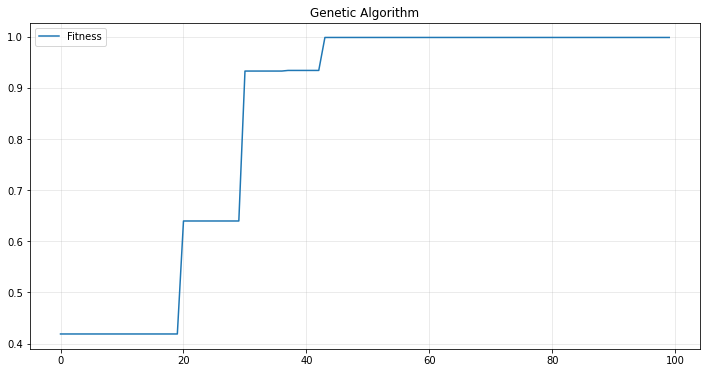

In [1437]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(f_history)
plt.xlabel = 'n-th Generation'
plt.ylabel = 'Fitness'
plt.legend(['Fitness'])

plt.title("Genetic Algorithm")
plt.grid(alpha=0.3)
plt.show()
